In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/archive.zip /content/



In [4]:
!unzip -q /content/archive.zip -d /content/plantvillage/


In [5]:
!ls /content/plantvillage/


plantvillage  PlantVillage


In [6]:
import os

data_dir = '/content/plantvillage'

print("Contents of dataset folder:")
print(os.listdir(data_dir))

for folder in os.listdir(data_dir):
    print(f"Classes in {folder}:")
    print(os.listdir(os.path.join(data_dir, folder))[:10])


Contents of dataset folder:
['PlantVillage', 'plantvillage']
Classes in PlantVillage:
['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Tomato_Leaf_Mold']
Classes in plantvillage:
['PlantVillage']


In [7]:
dataset_path = '/content/plantvillage/PlantVillage'


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False



x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(15, activation='softmax')(
    x)


model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
import zipfile

zip_path = '/content/archive.zip'
extract_path = '/content/PlantVillage'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to {extract_path}")


Extracted to /content/PlantVillage


In [11]:
import os


print(os.listdir('/content/PlantVillage'))


['PlantVillage', 'plantvillage']


In [12]:
import os
import shutil
import random

original_dataset_dir = '/content/PlantVillage/PlantVillage'



base_dir = '/content/PlantVillage_split'


train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)


val_ratio = 0.2


for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue


    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)


    images = os.listdir(class_path)
    random.shuffle(images)


    val_count = int(len(images) * val_ratio)

    val_images = images[:val_count]
    train_images = images[val_count:]


    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copyfile(src, dst)


    for img in val_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_class_dir, img)
        shutil.copyfile(src, dst)

print("Dataset split into train and validation folders successfully!")


Dataset split into train and validation folders successfully!


In [13]:
print("Train classes:", os.listdir(train_dir))
print("Validation classes:", os.listdir(val_dir))


Train classes: ['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot']
Validation classes: ['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot']


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_SIZE = (224, 224)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

IMG_SIZE = (224, 224)
NUM_CLASSES = 15

base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')


base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │        19,215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 220s 407ms/step - accuracy: 0.5524 - loss: 1.4441 - val_accuracy: 0.8147 - val_loss: 0.5945
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 206s 398ms/step - accuracy: 0.7988 - loss: 0.6093 - val_accuracy: 0.8447 - val_loss: 0.5015
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 202s 391ms/step - accuracy: 0.8305 - loss: 0.5156 - val_accuracy: 0.8554 - val_loss: 0.4480
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 197s 382ms/step - accuracy: 0.8423 - loss: 0.4798 - val_accuracy: 0.8654 - val_loss: 0.4189
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 199s 385ms/step - accuracy: 0.8445 - loss: 0.4613 - val_accuracy: 0.8576 - val_loss: 0.4321


In [16]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.8922 - loss: 0.3371
Validation Loss: 0.4321
Validation Accuracy: 0.8576


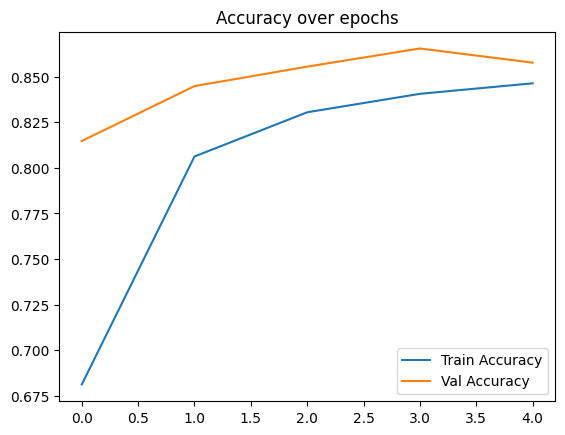

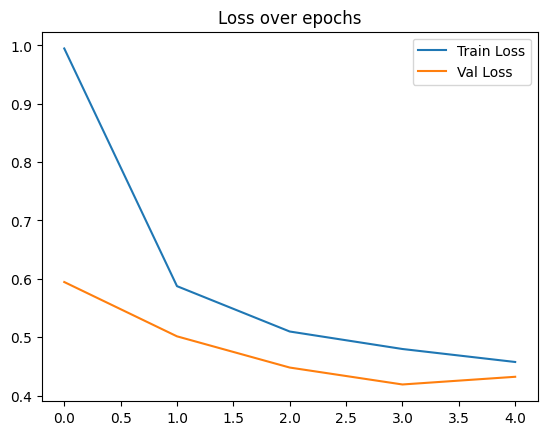

In [17]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


In [18]:

base_model.trainable = True

fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3
)


Epoch 1/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 236s 416ms/step - accuracy: 0.6057 - loss: 1.6178 - val_accuracy: 0.8678 - val_loss: 0.4035
Epoch 2/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 203s 393ms/step - accuracy: 0.8237 - loss: 0.5307 - val_accuracy: 0.8726 - val_loss: 0.3974
Epoch 3/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 203s 392ms/step - accuracy: 0.8575 - loss: 0.4129 - val_accuracy: 0.8865 - val_loss: 0.3548


In [19]:
from google.colab import files
uploaded = files.upload()


Saving TEST 1.jpeg to TEST 1.jpeg


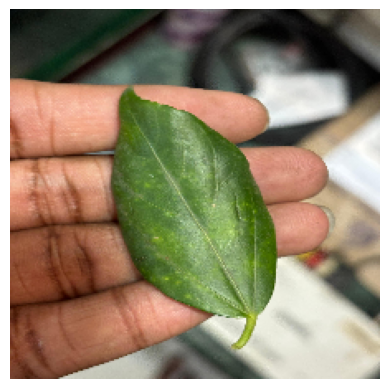

In [20]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess image
img_path = next(iter(uploaded))
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


In [21]:
pred = model.predict(img_array)
predicted_class = np.argmax(pred[0])
class_labels = list(train_generator.class_indices.keys())

print("Predicted class:", class_labels[predicted_class])



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Pepper__bell___healthy


In [22]:
model.save('/content/drive/MyDrive/SmartLML.h5')
